In [5]:
# imports
import panel as pn
import dash
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
from dotenv import load_dotenv, find_dotenv
import plotnine as p9
import os
import warnings
from scipy import linalg, optimize
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
production_path = Path('/Users', 'tylerhubbard', 'umnfintech', 'project1_group3', 'Resources', 'joined_production_mean_data.csv')
production_df = pd.read_csv(production_path, index_col='Year')
production_df

,Crops (tonnes),Area Harvested (ha),Yield (hg/ha)
Year,,,
2010,545752.0,1236288.2,4081.6
2011,613287.6,1319243.4,4469.2
2012,630098.8,1334580.6,4272.2
2013,610980.8,1328779.0,4156.4
2014,646788.8,1399964.0,4250.6
2015,682383.4,1479694.0,4272.2
2016,652293.8,1375332.6,4211.4
2017,751691.0,1624987.8,4311.2
2018,757511.4,1679538.6,4346.2


In [7]:
ivory_coast_temp_path = Path('/Users', 'tylerhubbard', 'umnfintech', 'project1_group3', 'Resources', "Annual Mean Temperature_Cote d'Ivoire_1901-2020_CIV.csv")
ivory_coast_temp = pd.read_csv(ivory_coast_temp_path)
ivory_coast_temp = ivory_coast_temp.rename(columns= {'Variable:' : 'Year', 'Unnamed: 2' : "Cote d'Ivoire"})
ivory_coast_temp = ivory_coast_temp.dropna()
ivory_coast_temp = ivory_coast_temp.set_index('Year')
ivory_coast_temp = pd.DataFrame(ivory_coast_temp, columns = ["Cote d'Ivoire"])
ivory_coast_temp = ivory_coast_temp.iloc[109:118]
ivory_coast_temp

,Cote d'Ivoire
Year,
2010.0,26.69
2011.0,26.49
2012.0,26.19
2013.0,26.46
2014.0,26.45
2015.0,26.66
2016.0,26.86
2017.0,26.79
2018.0,26.69


In [8]:
ghana_temp_path = Path('/Users', 'tylerhubbard', 'umnfintech', 'project1_group3', 'Resources', "Annual_Mean_Temperature_1901-2020_Ghana.csv")
ghana_temp = pd.read_csv(ghana_temp_path)
ghana_temp = ghana_temp.rename(columns= {'Variable:' : 'Year', 'Unnamed: 2' : "Ghana"})
ghana_temp = ghana_temp.dropna()
ghana_temp = ghana_temp.set_index('Year')
ghana_temp = pd.DataFrame(ghana_temp, columns = ["Ghana"])
ghana_temp = ghana_temp.iloc[109:118]
ghana_temp

,Ghana
Year,
2010,28.10
2011,27.79
2012,27.55
2013,27.73
2014,27.85
2015,27.98
2016,28.23
2017,28.06
2018,27.98


In [9]:
nigeria_temp_path = Path('/Users', 'tylerhubbard', 'umnfintech', 'project1_group3', 'Resources', "Annual_Mean_Temperature Data_1901-2020_Nigeria.csv")
nigeria_temp = pd.read_csv(nigeria_temp_path)
nigeria_temp = nigeria_temp.rename(columns= {'Variable:' : 'Year', 'Unnamed: 2' : "Nigeria"})
nigeria_temp = nigeria_temp.dropna()
nigeria_temp = nigeria_temp.set_index('Year')
nigeria_temp = pd.DataFrame(nigeria_temp, columns = ["Nigeria"])
nigeria_temp = nigeria_temp.iloc[109:118]
nigeria_temp

,Nigeria
Year,
2010.0,27.47
2011.0,27.1
2012.0,26.91
2013.0,27.05
2014.0,27.11
2015.0,26.91
2016.0,27.28
2017.0,26.88
2018.0,26.82


In [10]:
cameroon_temp_path = Path('/Users', 'tylerhubbard', 'umnfintech', 'project1_group3', 'Resources', "Annual_Mean_Temperature_Data_1901-2020_Cameroon.csv")
cameroon_temp = pd.read_csv(cameroon_temp_path)
cameroon_temp = cameroon_temp.rename(columns= {'Variable:' : 'Year', 'Unnamed: 2' : "Cameroon"})
cameroon_temp = cameroon_temp.dropna()
cameroon_temp = cameroon_temp.set_index('Year')
cameroon_temp = pd.DataFrame(cameroon_temp, columns = ["Cameroon"])
cameroon_temp = cameroon_temp.iloc[109:118]
cameroon_temp

,Cameroon
Year,
2010.0,23.75
2011.0,23.37
2012.0,23.32
2013.0,23.48
2014.0,23.5
2015.0,23.46
2016.0,23.77
2017.0,23.46
2018.0,23.45


In [11]:
ecuador_temp_path = Path('/Users', 'tylerhubbard', 'umnfintech', 'project1_group3', 'Resources', "Annual_Mean_Temperature_Data_1901_2020_Ecuador.csv")
ecuador_temp = pd.read_csv(ecuador_temp_path)
ecuador_temp = ecuador_temp.rename(columns= {'Variable:' : 'Year', 'Unnamed: 2' : "Ecuador"})
ecuador_temp = ecuador_temp.dropna()
ecuador_temp = ecuador_temp.set_index('Year')
ecuador_temp = pd.DataFrame(ecuador_temp, columns = ["Ecuador"])
ecuador_temp = ecuador_temp.iloc[109:118]
ecuador_temp

,Ecuador
Year,
2010.0,15.41
2011.0,15.15
2012.0,15.43
2013.0,15.01
2014.0,15.65
2015.0,16.24
2016.0,16.04
2017.0,15.84
2018.0,15.45


In [12]:
joined_temp = pd.concat([ghana_temp, ivory_coast_temp, nigeria_temp, cameroon_temp, ecuador_temp], axis='columns', join='inner')
joined_temp

,Ghana,Cote d'Ivoire,Nigeria,Cameroon,Ecuador
Year,,,,,
2010,28.10,26.69,27.47,23.75,15.41
2011,27.79,26.49,27.1,23.37,15.15
2012,27.55,26.19,26.91,23.32,15.43
2013,27.73,26.46,27.05,23.48,15.01
2014,27.85,26.45,27.11,23.5,15.65
2015,27.98,26.66,26.91,23.46,16.24
2016,28.23,26.86,27.28,23.77,16.04
2017,28.06,26.79,26.88,23.46,15.84
2018,27.98,26.69,26.82,23.45,15.45


In [13]:
joined_temp_mean = joined_temp.mean(axis=1)
joined_temp_mean = pd.DataFrame(joined_temp_mean)
joined_temp_mean = joined_temp_mean.rename(columns = {0 : 'Avg. Temp (C)'})
joined_temp_mean

,Avg. Temp (C)
Year,
2010,28.10
2011,27.79
2012,27.55
2013,27.73
2014,27.85
2015,27.98
2016,28.23
2017,28.06
2018,27.98


In [14]:
joined_temp_production_df = pd.concat([production_df, joined_temp_mean], axis='columns', join='inner')
joined_temp_production_df

,Crops (tonnes),Area Harvested (ha),Yield (hg/ha),Avg. Temp (C)
Year,,,,
2010,545752.0,1236288.2,4081.6,28.10
2011,613287.6,1319243.4,4469.2,27.79
2012,630098.8,1334580.6,4272.2,27.55
2013,610980.8,1328779.0,4156.4,27.73
2014,646788.8,1399964.0,4250.6,27.85
2015,682383.4,1479694.0,4272.2,27.98
2016,652293.8,1375332.6,4211.4,28.23
2017,751691.0,1624987.8,4311.2,28.06
2018,757511.4,1679538.6,4346.2,27.98


In [15]:
production_temp_correlation = joined_temp_production_df.corr()
production_temp_correlation

,Crops (tonnes),Area Harvested (ha),Yield (hg/ha),Avg. Temp (C)
Crops (tonnes),1.000000,0.980336,0.485710,0.214610
Area Harvested (ha),0.980336,1.000000,0.426079,0.260180
Yield (hg/ha),0.485710,0.426079,1.000000,-0.244056
Avg. Temp (C),0.214610,0.260180,-0.244056,1.000000


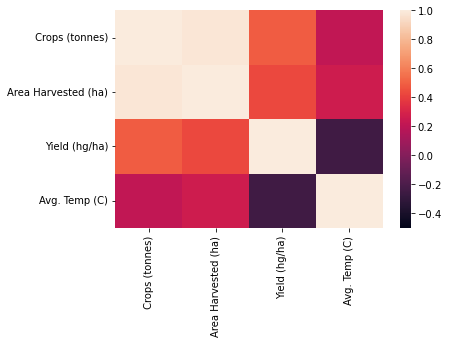

In [16]:
import seaborn as sns
temp_production_correlation_heatmap = sns.heatmap(production_temp_correlation, vmin=-0.5, vmax=1)

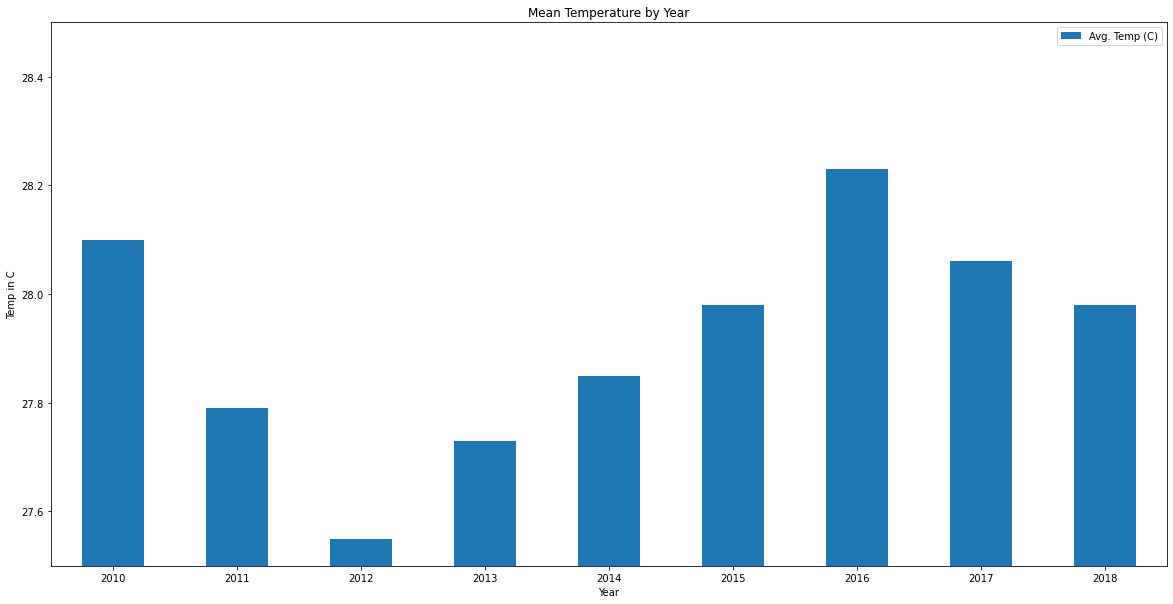

In [27]:
joined_temp_mean_plot = joined_temp_mean.plot(kind='bar', figsize = (20,10), title='Mean Temperature by Year', ylim=(27.5, 28.5),
                                             rot=0, ylabel='Temp in C')